## DAND Project 2: Investigate a Dataset
For this DAND Project, I am going to investigate the **Titanic Data**

The dataset is from [Kaggle](https://www.kaggle.com/c/titanic/data)

With data analysis, I hope to answer if passengers are more likely to survive due to:
1. Age
2. Gender
3. P - Class


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table we can tell:
1. 177 passengers' age is not included in the dataset, which we will have to take care of in the investigation
2. Average age of passengers is 29.699
3. On average, passengers paid 32.2 for fare, and the min fare price is zero, probably crew members
4. Someone paid 512.329 for the fare, I hope he/she survived

In [48]:
titanic_df.loc[titanic_df['Fare'] > 512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Looks like three people paid 512.3292 for the fare and they all survived. Withou straying furthur, I will start looking at survivorship by age.

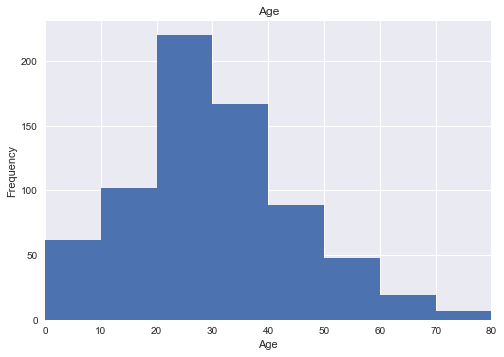

In [102]:
titanic_df.hist(column="Age", bins=range(0,90,10))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim([0,80])
plt.show()

Firstly I plotted a histogram to take a look at the age distribution, so I can decide the bin size of survival_rate/age histogram.

[0.7045454545454546, 0.35, 0.5789473684210527, 0.34375, 0.3442622950819672, 0.3888888888888889, 0.4659090909090909, 0.417910447761194, 0.3617021276595745, 0.41025641025641024, 0.4166666666666667, 0.3888888888888889, 0.2857142857142857, 0.0, 0.0, 1.0, 0]


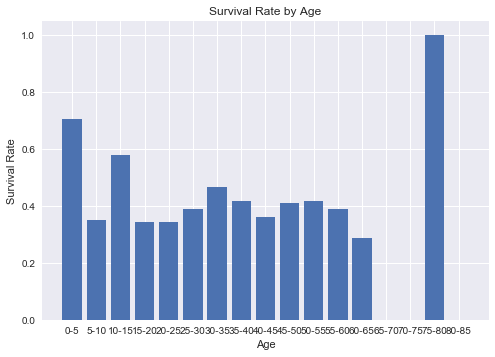

In [97]:
binned_by_age = []
survival_by_age = []

for i in range (0,8):
    binned_by_age.append(titanic_df.loc[(titanic_df['Age'] <= (i + 1) * 10) & (titanic_df['Age'] > i * 10)])
for j in range (0,8):
    if len(binned_by_age[j]) != 0:
        survival_by_age.append(len(binned_by_age[j].loc[titanic_df['Survived'] == 1])/len(binned_by_age[j]))
    else: survival_by_age.append(0)
print(survival_by_age)

objects = ['0-10', '10-20','20-30','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70', \
          '70-75','75-80','80-85']
y_pos = np.arange(len(objects))
plt.bar(y_pos, survival_by_age)
plt.xticks(y_pos, objects)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.show()

In [3]:
###Group passengers by survivorship and gender for furthur analysis

survived = titanic_df.loc[titanic_df['Survived'] == 1]
survived_count = len(survived['Name'])

survived_male = survived.loc[survived['Sex'] == 'male']
survived_male_count = len(survived_male['Name'])

survived_female = survived.loc[survived['Sex'] == 'female']
survived_female_count = len(survived_female['Name'])

perished = titanic_df.loc[titanic_df['Survived'] == 0]
perished_count = len(perished['Name'])

perished_male = perished.loc[perished['Sex'] == 'male']
perished_male_count = len(perished_male['Name'])

perished_female = perished.loc[perished['Sex'] == 'female']
perished_female_count = len(perished_female['Name'])


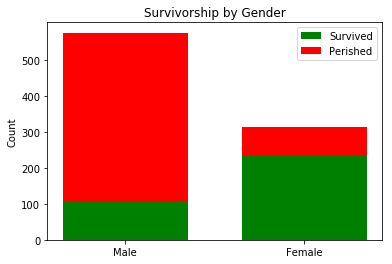

In [35]:
ind = np.arange(2)
width = 0.7

p1 = plt.bar(ind, (survived_male_count, survived_female_count), width, color='g')
p2 = plt.bar(ind, (perished_male_count, perished_female_count), 
             width, bottom=(survived_male_count, survived_female_count), color='r')

plt.ylabel('Count')
plt.title('Survivorship by Gender')
plt.xticks(ind, ('Male', 'Female'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'))

plt.show()

In [23]:
print (survived_male_count, perished_male_count)
print (survived_female_count, perished_female_count)


109 468
233 81


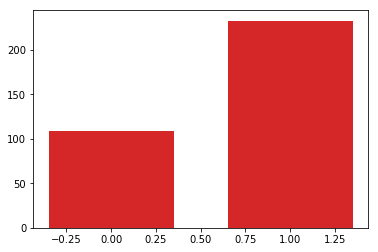

In [26]:
p1 = plt.bar(ind, (survived_male_count, survived_female_count), width, color='#d62728')
plt.show()